In [1]:
import pandas as pd
import missingno as msno

from hidromet import config
from hidromet import utils


In [2]:
contornos = config.dir_contorno
dir_series_concatenadas = config.dir_prec_concat
info_bacias = list(dir_series_concatenadas.glob("*.json"))
series = list(dir_series_concatenadas.glob("Iguaçú.csv"))

In [3]:
df_series = list()
for serie in series:
    df = pd.read_csv(serie)
    df_series.append(df)

series_concatenadas = pd.concat(df_series, axis=1)
series_concatenadas.rename(columns={"Unnamed: 0": "time"}, inplace=True)
series_concatenadas.set_index("time", inplace=True)

<AxesSubplot:>

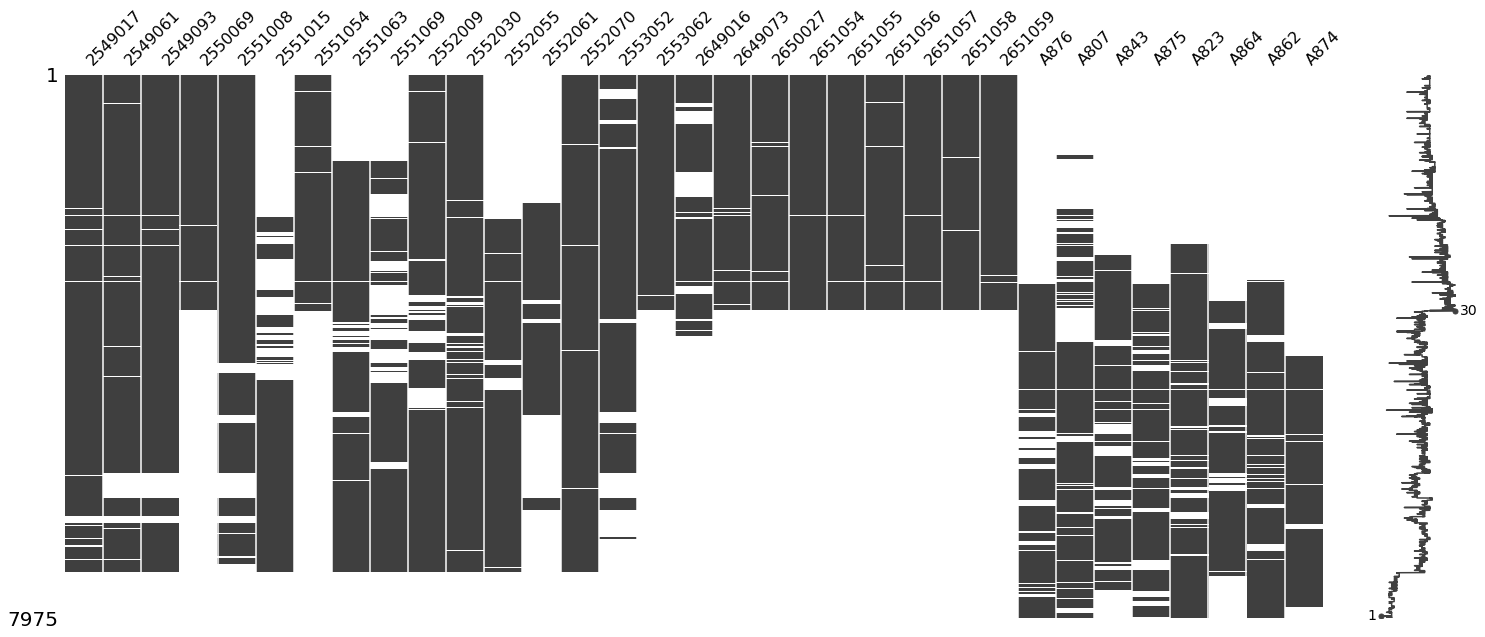

In [4]:
msno.matrix(series_concatenadas)

<AxesSubplot:>

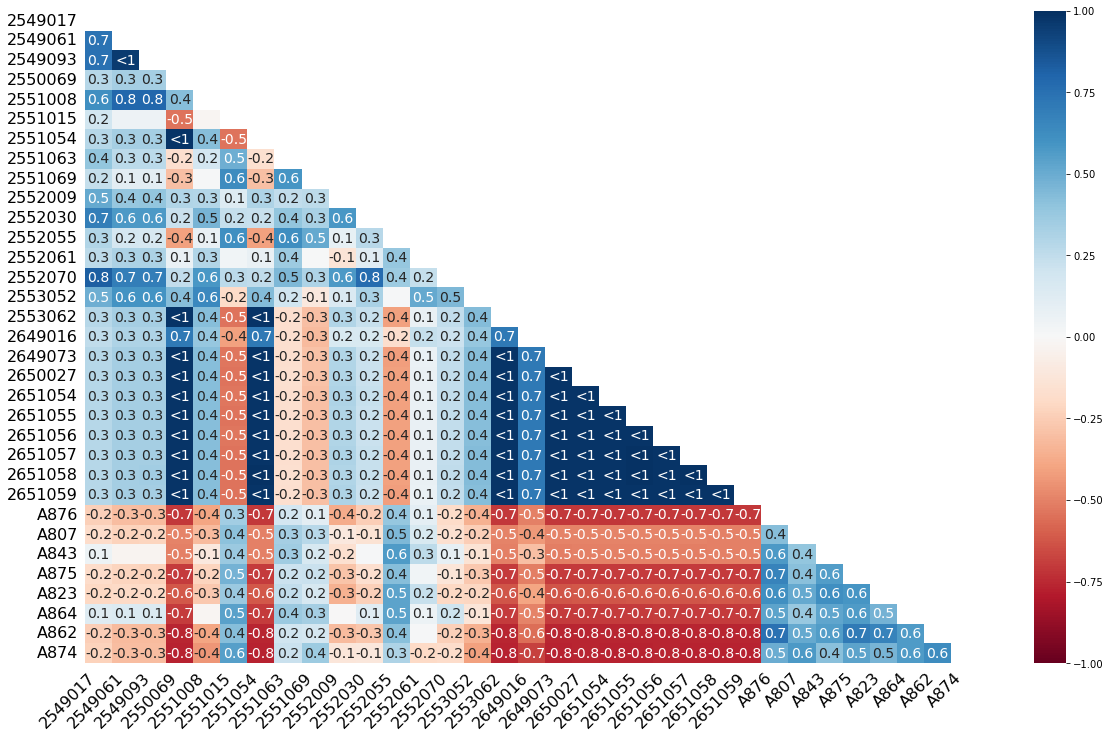

In [5]:
msno.heatmap(series_concatenadas)

<AxesSubplot:>

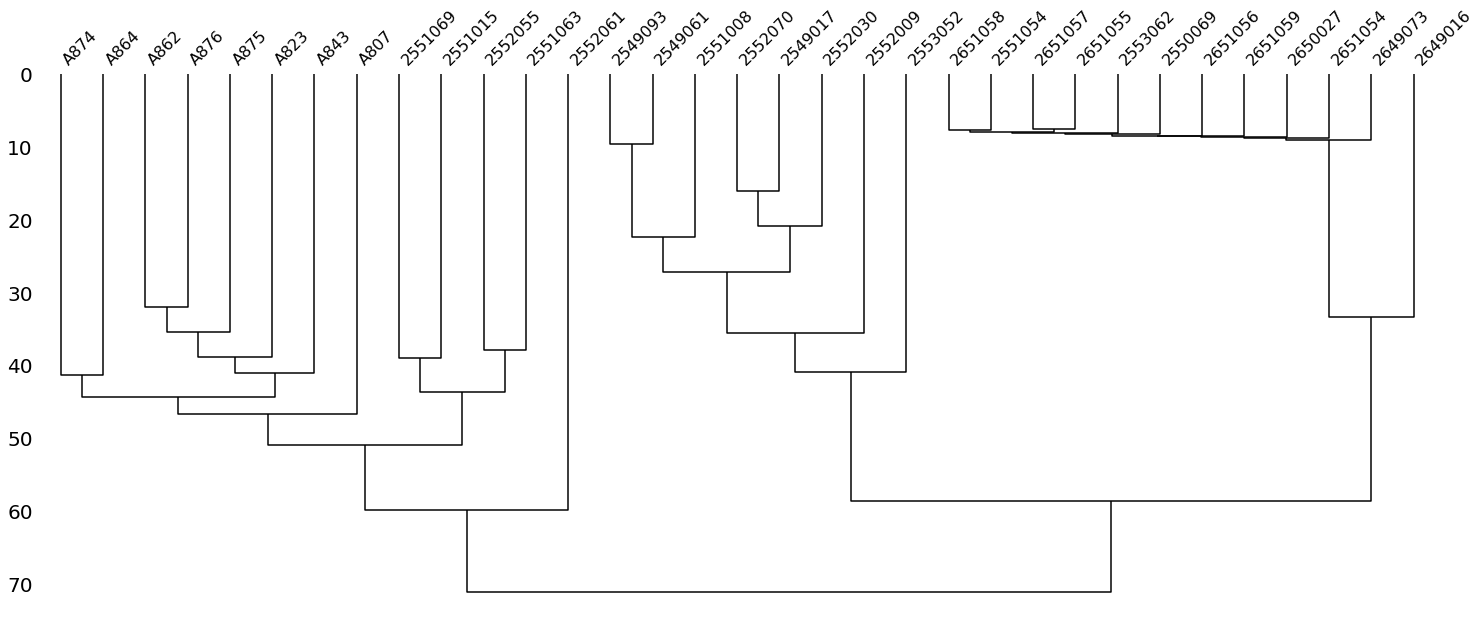

In [6]:
msno.dendrogram(series_concatenadas)